# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify the nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    # Use citipy to find the nearest city based on the lat, lng
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | mancio lima
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | dudinka
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | kone
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | we
City not found. Skipping...
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | trogir
Processing Record 14 of Set 1 | tolanaro
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | meadow lake
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | teguise
Processing Record 21 of Set 1 | hawaiian paradise pa

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,25.39,73,40,27.00,RU,1702598091
1,ribeira grande,38.5167,-28.7000,63.77,84,76,17.00,PT,1702598091
2,port-aux-francais,-49.3500,70.2167,42.84,81,28,25.70,TF,1702598092
3,mancio lima,-7.6142,-72.8958,80.67,89,40,3.44,BR,1702598092
4,waitangi,-43.9535,-176.5597,53.15,65,62,7.90,NZ,1702598092


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv")

# Display sample data
city_data_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,petropavlovsk-kamchatsky,53.0452,158.6483,25.39,73,40,27.00,RU,1702598091
1,1,ribeira grande,38.5167,-28.7000,63.77,84,76,17.00,PT,1702598091
2,2,port-aux-francais,-49.3500,70.2167,42.84,81,28,25.70,TF,1702598092
3,3,mancio lima,-7.6142,-72.8958,80.67,89,40,3.44,BR,1702598092
4,4,waitangi,-43.9535,-176.5597,53.15,65,62,7.90,NZ,1702598092


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

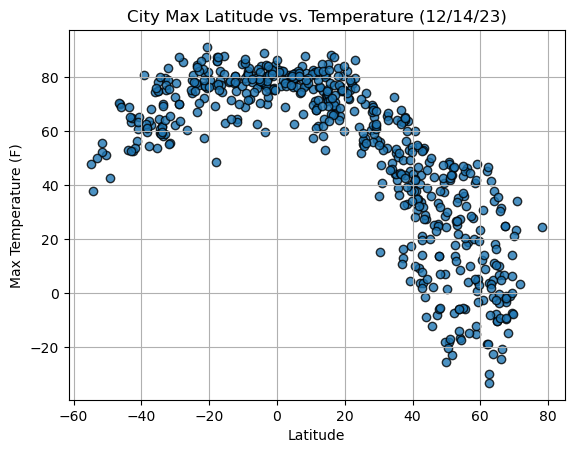

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

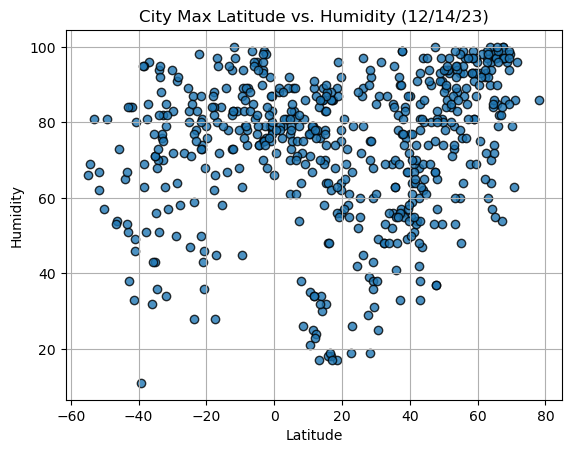

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

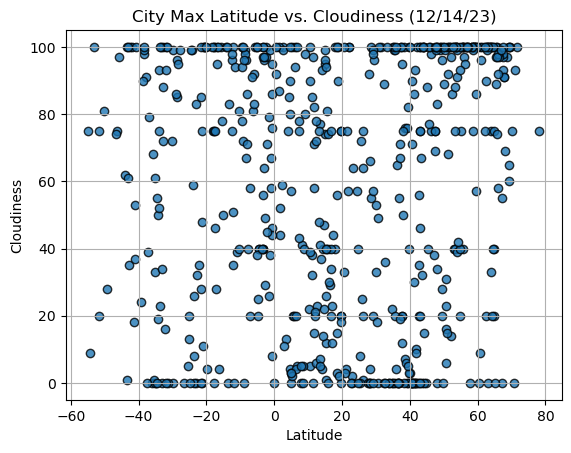

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

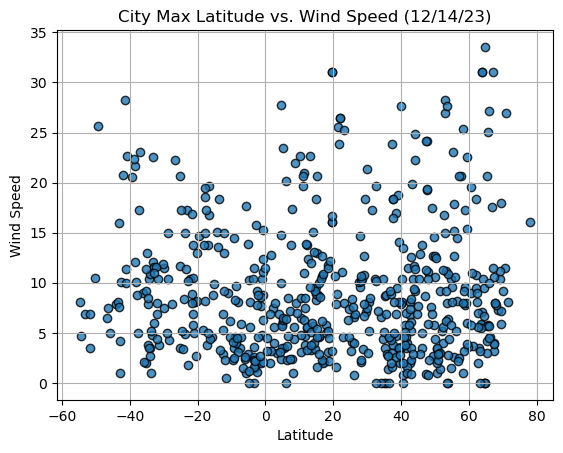

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r-")
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nr = {rvalue:.2f}"
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [13]:
# Filter the original DataFrame for Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,petropavlovsk-kamchatsky,53.0452,158.6483,25.39,73,40,27.00,RU,1702598091
1,1,ribeira grande,38.5167,-28.7000,63.77,84,76,17.00,PT,1702598091
5,5,dudinka,69.4058,86.1778,-7.38,94,100,18.01,RU,1702598092
6,6,wailua homesteads,22.0669,-159.3780,77.43,61,100,26.46,US,1702598092
11,11,trogir,43.5125,16.2517,53.80,47,0,10.36,HR,1702598093


In [14]:
# Filter the original DataFrame for Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,port-aux-francais,-49.3500,70.2167,42.84,81,28,25.70,TF,1702598092
3,3,mancio lima,-7.6142,-72.8958,80.67,89,40,3.44,BR,1702598092
4,4,waitangi,-43.9535,-176.5597,53.15,65,62,7.90,NZ,1702598092
7,7,arraial do cabo,-22.9661,-42.0278,76.96,78,0,17.27,BR,1702597957
8,8,kone,-21.0595,164.8658,87.33,43,11,4.97,NC,1702598092


###  Temperature vs. Latitude Linear Regression Plot

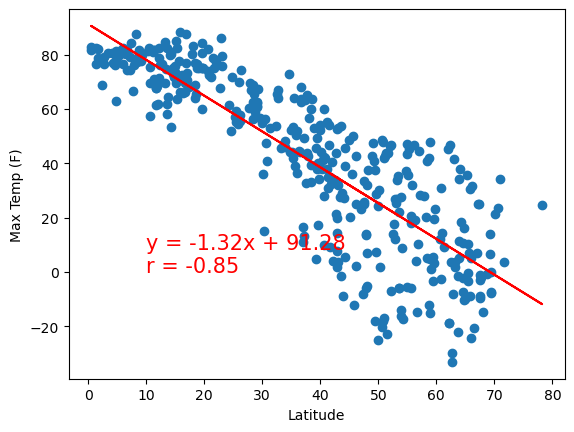

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Latitude', 'Max Temp (F)', (10, 0))

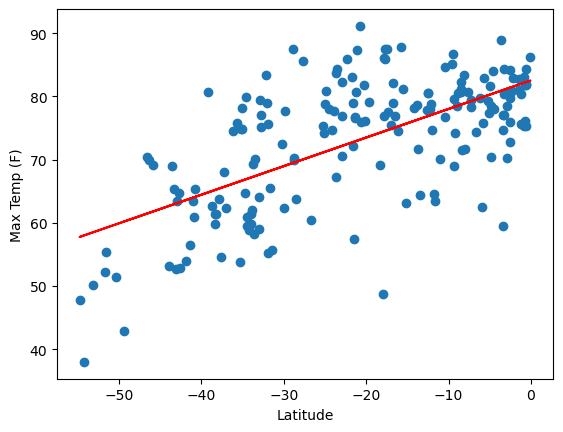

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Latitude', 'Max Temp (F)', (10, 0))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [17]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,petropavlovsk-kamchatsky,53.0452,158.6483,25.39,73,40,27.00,RU,1702598091
1,1,ribeira grande,38.5167,-28.7000,63.77,84,76,17.00,PT,1702598091
5,5,dudinka,69.4058,86.1778,-7.38,94,100,18.01,RU,1702598092
6,6,wailua homesteads,22.0669,-159.3780,77.43,61,100,26.46,US,1702598092
11,11,trogir,43.5125,16.2517,53.80,47,0,10.36,HR,1702598093
...,...,...,...,...,...,...,...,...,...,...
573,573,shalkar,47.8288,59.6258,13.77,37,100,19.35,KZ,1702598212
574,574,varadero,23.1536,-81.2514,75.96,79,64,25.23,CU,1702598213
577,577,odesskoye,54.2111,72.9651,-17.18,86,42,4.34,RU,1702598213
580,580,cove,7.2210,2.3402,74.44,54,43,2.39,BJ,1702598214


In [18]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
southern_hemi_df

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,petropavlovsk-kamchatsky,53.0452,158.6483,25.39,73,40,27.00,RU,1702598091
1,1,ribeira grande,38.5167,-28.7000,63.77,84,76,17.00,PT,1702598091
5,5,dudinka,69.4058,86.1778,-7.38,94,100,18.01,RU,1702598092
6,6,wailua homesteads,22.0669,-159.3780,77.43,61,100,26.46,US,1702598092
11,11,trogir,43.5125,16.2517,53.80,47,0,10.36,HR,1702598093
...,...,...,...,...,...,...,...,...,...,...
573,573,shalkar,47.8288,59.6258,13.77,37,100,19.35,KZ,1702598212
574,574,varadero,23.1536,-81.2514,75.96,79,64,25.23,CU,1702598213
577,577,odesskoye,54.2111,72.9651,-17.18,86,42,4.34,RU,1702598213
580,580,cove,7.2210,2.3402,74.44,54,43,2.39,BJ,1702598214


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

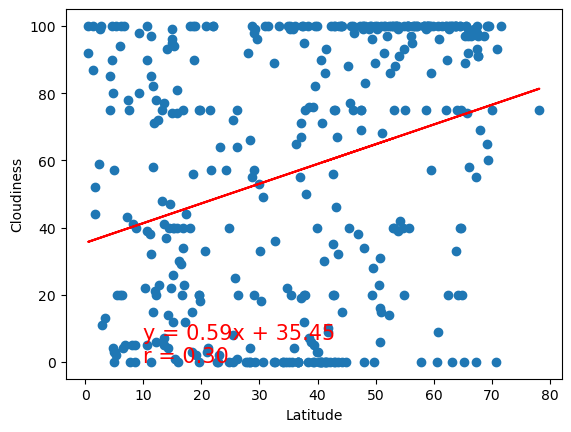

In [19]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness', (10, 0))

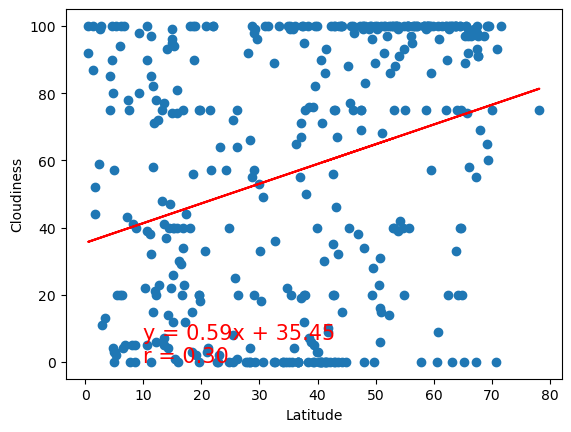

In [20]:
# Linear regression on Northern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness', (10, 0))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

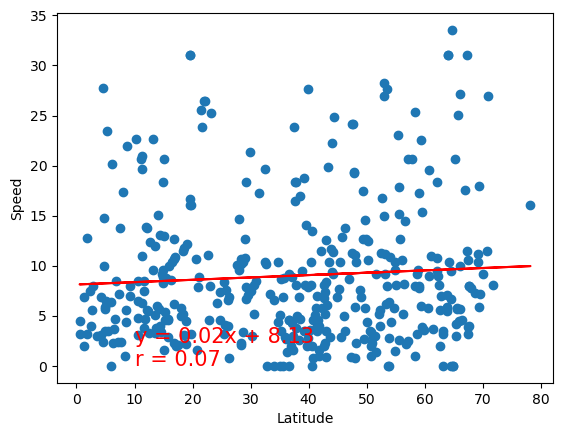

In [21]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Latitude', 'Speed', (10, 0))

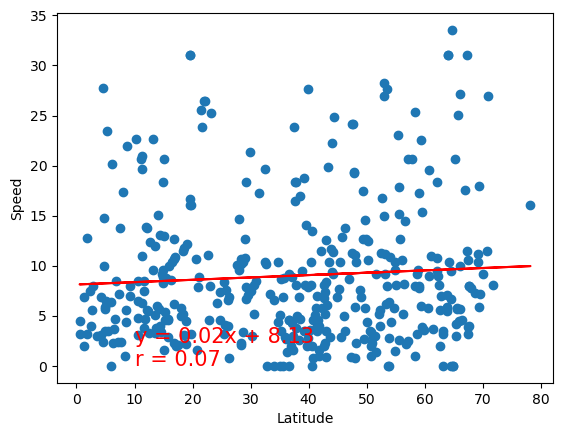

In [22]:
# Linear regression on Northern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Latitude', 'Speed', (10, 0))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [23]:
Linear relationship: Proportional changes between two variables.

Scatter plot: Visual representation of the relationship.

Linear regression line: Modeled by y = mx + b.

Slope (m): Reflects the rate of change.

Correlation coefficient (r): Measures strength and direction.

Positive (negative) slope: Indicates a positive (negative) relationship.

Interpretation: Understanding the impact of the slope on the dependent variable.

Goodness of fit: Assessed by metrics like R-squared.

Predictions: Utilizing the regression line for forecasting.

Fundamental concept: Provides measurable insights into variable interactions.

SyntaxError: invalid syntax (1067457274.py, line 1)